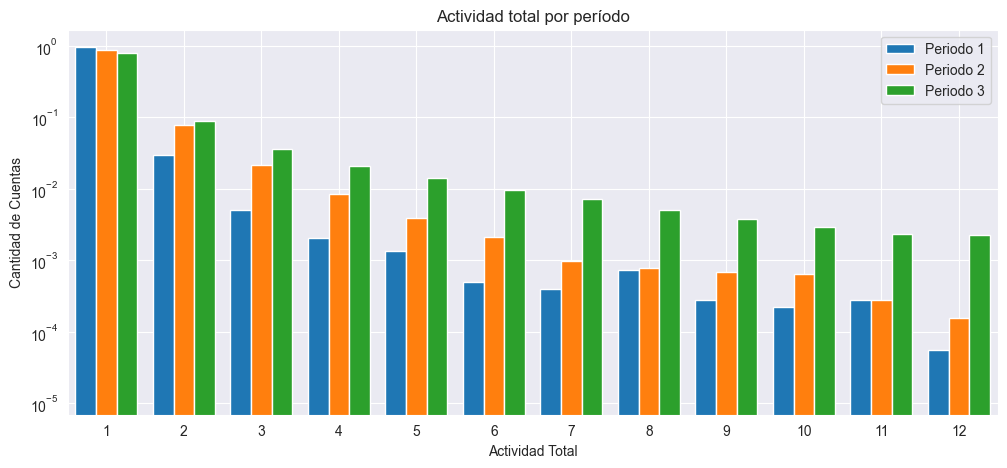

In [1]:
import pickle
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Data sets 4 y 5\periodo1_lists\periodo1_data_lists', 'rb') as f:
    data_1 = pickle.load(f)
with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Data sets 4 y 5\periodo2_lists\periodo2_data_lists', 'rb') as f:
    data_2 = pickle.load(f)
with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Data sets 4 y 5\periodo3_lists\periodo3_data_lists', 'rb') as f:
    data_3 = pickle.load(f)

data_data_frame_1= pd.DataFrame({'periodo1': data_1[37]})
data_data_frame_2 = pd.DataFrame({'periodo2': data_2[37]})
data_data_frame_3 = pd.DataFrame({'periodo3': data_3[37]})

# csv_data = data_data_frame_1.to_csv(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Final CSVs\total_activity_per_period\total_activity_period1.csv', index = False)
# csv_data = data_data_frame_2.to_csv(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Final CSVs\total_activity_per_period\total_activity_period2.csv', index = False)
# csv_data = data_data_frame_3.to_csv(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Final CSVs\total_activity_per_period\total_activity_period3.csv', index = False)

plt.rc('figure', figsize= (12,5))
sb.set_style('darkgrid')
# plt.hist(data_3[37], bins =np.max(np.array(data_3[37])), color = 'green', label = 'Periodo 3', density=True, alpha = 0.5)
# plt.hist(data_2[37], bins =np.max(np.array(data_2[37])), color = 'blue', label = 'Periodo 2',density=True, alpha = 0.5)
# plt.hist(data_1[37], bins =np.max(np.array(data_1[37])), color = 'red', label = 'Periodo 1', density=True, alpha = 0.5)
n, bins, patches =plt.hist([data_1[37], data_2[37], data_3[37]], bins = np.arange(1,100)-0.5, label = ['Periodo 1', 'Periodo 2', 'Periodo 3'], density=True)
plt.xlabel('Actividad Total')
plt.ylabel('Cantidad de Cuentas')
plt.yscale('log')
plt.legend()
plt.xticks(list(range(1,int(np.max(bins)+0.5))))
plt.xlim(0.5,12.5)
# plt.ylim(0,0.1)
plt.title('Actividad total por período')
plt.show()




In [7]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sb
from datetime import time
import os
import pandas as pd
from scipy.signal import savgol_filter



price_data = pd.read_csv(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Algo_price_data\algo_price_data.csv')

with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Data sets 4 y 5\periodo3_dataframe\periodo3_17600000_500', 'rb') as file:
    data = pd.read_pickle(file)

pay_data = data[data['Transaction Type'] == 'pay']
amount = pay_data['Transaction Amount'].tolist()
amount = [float(x) for x in amount if x != 'NA']
multiplier = 0.000001
algo_amount = []
algo_amount = [round(element*multiplier,2) for element in amount]
total_amount = round(sum(algo_amount,2))
#aca ya resolvi cuanto algo se envio en este chunk, ahora defino una fecha
dates = data["Transaction Date"].tolist()
new_dates = [date.date() for date in dates]
chunk_date = new_dates[0]
date_row = price_data[price_data['Date'] == str(chunk_date)]
chunk_mean_price = (float(date_row['Open']) + float(date_row['Close']))/2
print(chunk_date, chunk_mean_price, total_amount)

#periodo 1: 11000000-14600000
#periodo 2: 14800000-17400000
#periodo 3: 17600000-23000000
#Hice incrementos de 50000 bloques y saque 500 bloques

initial_block = 14800000
final_block = 17400000
number_of_blocks = 500
increment = 50000
initial_number = list(range(initial_block, final_block + increment, increment))
path = r"D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Data sets 4 y 5\periodo2_dataframe\periodo2_"
chunk_dates = []
chunk_mean_prices = []
total_amounts = []

for init_number in initial_number:
    data = pd.read_pickle(path+str(init_number)+"_"+str(number_of_blocks))
    pay_data = data[data['Transaction Type'] == 'pay']
    amount = pay_data['Transaction Amount'].tolist()
    amount = [float(x) for x in amount if x != 'NA']
    multiplier = 0.000001
    algo_amount = []
    algo_amount = [round(element*multiplier,2) for element in amount]
    total_amount = round(sum(algo_amount,2))
    #aca ya resolvi cuanto algo se envio en este chunk, ahora defino una fecha
    dates = data["Transaction Date"].tolist()
    new_dates = [date.date() for date in dates]
    chunk_date = new_dates[0]
    date_row = price_data[price_data['Date'] == str(chunk_date)]
    chunk_mean_price = (float(date_row['Open']) + float(date_row['Close']))/2
    chunk_dates.append(chunk_date)
    chunk_mean_prices.append(chunk_mean_price)
    total_amounts.append(total_amount)

# print(chunk_dates)
# print(chunk_mean_prices)
# print(total_amounts)

# print(np.corrcoef(chunk_mean_prices, total_amounts)[0,1])

# print(np.max(np.array(chunk_mean_prices)))
# total_amounts = savgol_filter(total_amounts, 25, 7)

# try_prices = [x/np.max(np.array(chunk_mean_prices)) for x in chunk_mean_prices]
# try_amounts = [x/np.max(np.array(total_amounts)) for x in total_amounts]
periodo2_mean_prices = chunk_mean_prices
periodo2_total_amounts = total_amounts


C:\Users\juane\AppData\Local\Temp\ipykernel_3520\2687091744.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  chunk_mean_price = (float(date_row['Open']) + float(date_row['Close']))/2
C:\Users\juane\AppData\Local\Temp\ipykernel_3520\2687091744.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  chunk_mean_price = (float(date_row['Open']) + float(date_row['Close']))/2
C:\Users\juane\AppData\Local\Temp\ipykernel_3520\2687091744.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  chunk_mean_price = (float(date_row['Open']) + float(date_row['Close']))/2
C:\Users\juane\AppData\Local\Temp\ipykernel_3520\2687091744.py:61: FutureWarning: Calling float on a single element Series is deprecated and w

2021-11-23 1.7864335 1287961


C:\Users\juane\AppData\Local\Temp\ipykernel_3520\2687091744.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  chunk_mean_price = (float(date_row['Open']) + float(date_row['Close']))/2
C:\Users\juane\AppData\Local\Temp\ipykernel_3520\2687091744.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  chunk_mean_price = (float(date_row['Open']) + float(date_row['Close']))/2
C:\Users\juane\AppData\Local\Temp\ipykernel_3520\2687091744.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  chunk_mean_price = (float(date_row['Open']) + float(date_row['Close']))/2
C:\Users\juane\AppData\Local\Temp\ipykernel_3520\2687091744.py:61: FutureWarning: Calling float on a single element Series is deprecated and w

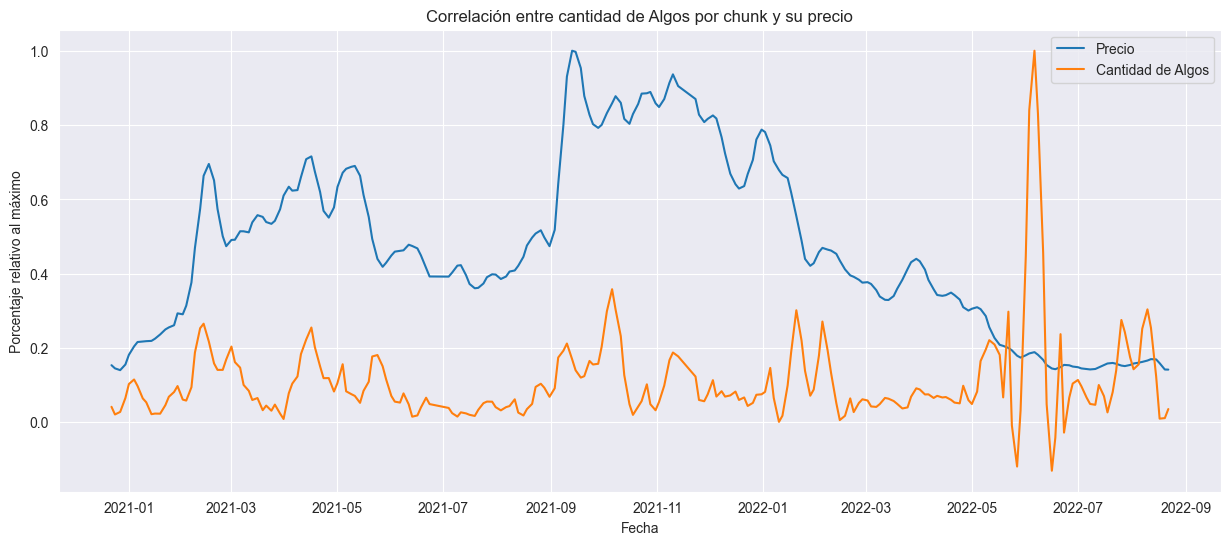

In [9]:
with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Data sets 4 y 5\periodo1_lists\periodo1_dates', 'rb') as file:
    periodo1_dates = pd.read_pickle(file)

with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Data sets 4 y 5\periodo2_lists\periodo2_dates', 'rb') as file:
    periodo2_dates = pd.read_pickle(file)

with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Data sets 4 y 5\periodo3_lists\periodo3_dates', 'rb') as file:
    periodo3_dates = pd.read_pickle(file)

mean_prices = periodo1_mean_prices + periodo2_mean_prices + periodo3_mean_prices
periods_amounts = periodo1_total_amounts + periodo2_total_amounts + periodo3_total_amounts

periods_dates = periodo1_dates + periodo2_dates + periodo3_dates
mean_prices =savgol_filter(mean_prices, 15, 7)
periods_amounts = savgol_filter(periods_amounts, 15, 7)

end_mean_prices = mean_prices/np.max(mean_prices)
end_periods_amounts = periods_amounts/np.max(periods_amounts)

data_data_frame = pd.DataFrame({'dates':periods_dates, 'meanprices': end_mean_prices, 'amounts': end_periods_amounts})
csv_data = data_data_frame.to_csv(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\Final CSVs\price_vs_amount\price_vs_amount.csv', index = False)


plt.rc('figure', figsize= (15,6))
sb.set_style('darkgrid')
plt.plot(periods_dates, end_mean_prices, label = 'Precio')
plt.plot(periods_dates, end_periods_amounts, label = 'Cantidad de Algos')
plt.legend()
plt.title('Correlación entre cantidad de Algos por chunk y su precio')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje relativo al máximo')
plt.show()
